In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import requests
from bs4 import BeautifulSoup as bs 

In [3]:
import numpy as np
import pandas as pd

#!pip install urllib
import urllib.request as url 

#!pip install bs4
from bs4 import BeautifulSoup as bs

!pip install wordcloud
from wordcloud import WordCloud

import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
!conda install -c conda-forge spacy
!python -m spacy download en
!pip install -U spacy
import spacy
nlp = spacy.load("en_core_web_sm")


# import en_core_web_sm
# nlp = en_core_web_sm.load()

/bin/bash: conda: command not found
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 10.4MB 44.2MB/s 
     |████████████████████████████████| 3.7MB 37.1MB/s 
     |████████████████████████████████| 2.2MB 59.9MB/s 
     |████████████████████████████████| 122kB 60.3MB/s 
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstalling spacy-2.1.9:
      Successfully uninstalled spacy

In [5]:
!pip install requests
!pip install lxml
!pip install bs4

In [1]:
list1 = []
link_newest = "https://news.ycombinator.com/"
for i in range(1,21):
  if i == 1:
    link1="https://news.ycombinator.com/newest"
    list1.append(link1)
  else:
    link1 = link_newest + add
    list1.append(link1)
  print(link1)
  soup= bs(url.urlopen(link1))
  for link in soup.find_all('a'):
    try:
      if len(link.text.strip()) > 1 and re.match('More',link.text):
          add = link['href']
    except TypeError:
           i = i+1

https://news.ycombinator.com/newest


NameError: name 'bs' is not defined

In [2]:
list1

['https://news.ycombinator.com/newest']

In [0]:
d = {'Title':[],'age':[],'posted_by_user':[],'URL':[],'domain':[],'num_upvotes':[],'comments':[]}
i = 0
for i in list1:
  soup =  bs(url.urlopen(i))
  i = 0
  for link in soup.find_all('a'):
    if len(link.text.strip()) > 1 and bool(re.match('http',link['href'])) and not bool(re.search('past|web|guidelines|faq|support|api|security|lists|bookmarklet|legal|apply to yc|contact|search|log in|subscribe',link.text.lower()))  and not bool(
          re.search('indianblogginers|indianbloggers|twitter|facebook|images|youtube|docs.google.com|myaccount',link['href'])) :
          d['Title'].append(link.string)
          d['URL'].append(link['href'])
          spans1=soup.find_all('span',{'class' : 'sitestr'})
          lines1 = [span.get_text() for span in spans1]
          spans2=soup.find_all('span',{'class' : 'score'})
          lines2 = [span.get_text() for span in spans2]
          spans3=soup.find_all('span',{'class' : 'age'})
          lines3 = [span.get_text() for span in spans3]
          spans4=soup.find_all('a',{'class' : 'hnuser'})
          lines4 = [span.get_text() for span in spans4]
          spans5=soup.find_all("td",{"class": "subtext"})
          lines5 = [span.get_text() for span in spans5]
          d['domain'].append(lines1[i])
          d['num_upvotes'].append(lines2[i])
          d['age'].append(lines3[i])
          d['posted_by_user'].append(lines4[i])
          d['comments'].append(lines5[i])
          i=i+1
blog_list = pd.DataFrame(d)

#Extract the recent 500 posts information from Hacker News websit

In [9]:
blog_list

,Title,age,posted_by_user,URL,domain,num_upvotes,comments
0,Robocallers face fight on many fronts,0 minutes ago,petercooper,https://www.axios.com/robocalls-fcc-congress-t...,phoronix.com,1 point,\n1 point by petercooper 0 minutes ago | hide...
1,World's First and Only Hackproof Site,0 minutes ago,hhs,http://hackprooftechnologies.com/index.html,axios.com,1 point,\n1 point by hhs 0 minutes ago | hide | past ...
2,Affinity Profiling and Discrimination by Assoc...,1 minute ago,hexadec,https://poseidon01.ssrn.com/delivery.php?ID=19...,hackprooftechnologies.com,1 point,\n1 point by hexadec 1 minute ago | hide | pa...
3,React Benefits: A Blessing for Businesses?,2 minutes ago,DyslexicAtheist,https://habr.com/en/post/480070/,ssrn.com,1 point,\n1 point by DyslexicAtheist 2 minutes ago | ...
4,Soundness bugs in Rust libraries: can't live w...,3 minutes ago,martinlaz,https://docs.rs/dtolnay/0.0.7/dtolnay/macro._0...,technologyreview.com,1 point,\n1 point by martinlaz 3 minutes ago | hide |...
...,...,...,...,...,...,...,...
489,Rise of the Antarctican Accent,17 hours ago,ilikepi,https://www.scientificamerican.com/podcast/epi...,amazon.com,2 points,\n2 points by ilikepi 17 hours ago | hide | p...
490,Opinion: Small modular reactors help in the fi...,17 hours ago,humps,https://www.theglobeandmail.com/business/comme...,igalia.com,4 points,\n4 points by humps 17 hours ago | hide | pas...
491,Benchmarking Spreadsheet Systems,17 hours ago,davidfoster,https://blog.acolyer.org/2019/12/06/benchmarki...,onezero.medium.com,3 points,\n3 points by davidfoster 17 hours ago | hide...
492,We Need to Measure More,17 hours ago,tobr,https://www.bloomberg.com/opinion/articles/201...,frontiersin.org,3 points,\n3 points by tobr 17 hours ago | hide | past...


#For each url, extract the full article from its respective website.


In [0]:
def extract_article(link1):
    text_data =''
    exceptionMessage = ''
    try:
        html = url.urlopen(link1).read()
        soup = bs(html, 'html.parser')
        text_all = soup.find_all('p') #Selecting all the paragraphs
        for text in text_all:
            if not 'copyright' in text.text.lower():
                text_data = text_data +" " +text.text
    except Exception as e:
        exceptionMessage = e
        pass
    return text_data,exceptionMessage

In [11]:
blog_list[['text','exception']] = blog_list['URL'].apply(extract_article).apply(pd.Series)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

In [12]:
blog_list

,Title,age,posted_by_user,URL,domain,num_upvotes,comments,text,exception
0,Robocallers face fight on many fronts,0 minutes ago,petercooper,https://www.axios.com/robocalls-fcc-congress-t...,phoronix.com,1 point,\n1 point by petercooper 0 minutes ago | hide...,"Federal regulators, lawmakers, and private co...",
1,World's First and Only Hackproof Site,0 minutes ago,hhs,http://hackprooftechnologies.com/index.html,axios.com,1 point,\n1 point by hhs 0 minutes ago | hide | past ...,In The News,
2,Affinity Profiling and Discrimination by Assoc...,1 minute ago,hexadec,https://poseidon01.ssrn.com/delivery.php?ID=19...,hackprooftechnologies.com,1 point,\n1 point by hexadec 1 minute ago | hide | pa...,,HTTP Error 403: Forbidden
3,React Benefits: A Blessing for Businesses?,2 minutes ago,DyslexicAtheist,https://habr.com/en/post/480070/,ssrn.com,1 point,\n1 point by DyslexicAtheist 2 minutes ago | ...,Only users with full accounts can post commen...,
4,Soundness bugs in Rust libraries: can't live w...,3 minutes ago,martinlaz,https://docs.rs/dtolnay/0.0.7/dtolnay/macro._0...,technologyreview.com,1 point,\n1 point by martinlaz 3 minutes ago | hide |...,"dtolnay by David Tolnay , 2019.12.09 My role ...",
...,...,...,...,...,...,...,...,...,...
489,Rise of the Antarctican Accent,17 hours ago,ilikepi,https://www.scientificamerican.com/podcast/epi...,amazon.com,2 points,\n2 points by ilikepi 17 hours ago | hide | p...,Residents of an overwintering station in Anta...,
490,Opinion: Small modular reactors help in the fi...,17 hours ago,humps,https://www.theglobeandmail.com/business/comme...,igalia.com,4 points,\n4 points by humps 17 hours ago | hide | pas...,The subject who is truly loyal to the Chief M...,
491,Benchmarking Spreadsheet Systems,17 hours ago,davidfoster,https://blog.acolyer.org/2019/12/06/benchmarki...,onezero.medium.com,3 points,\n3 points by davidfoster 17 hours ago | hide...,the morning paper a random walk through Compu...,
492,We Need to Measure More,17 hours ago,tobr,https://www.bloomberg.com/opinion/articles/201...,frontiersin.org,3 points,\n3 points by tobr 17 hours ago | hide | past...,"To continue, please click the box below to le...",


In [0]:
blog_data = blog_list.copy()

In [14]:
blog_data

,Title,age,posted_by_user,URL,domain,num_upvotes,comments,text,exception
0,Robocallers face fight on many fronts,0 minutes ago,petercooper,https://www.axios.com/robocalls-fcc-congress-t...,phoronix.com,1 point,\n1 point by petercooper 0 minutes ago | hide...,"Federal regulators, lawmakers, and private co...",
1,World's First and Only Hackproof Site,0 minutes ago,hhs,http://hackprooftechnologies.com/index.html,axios.com,1 point,\n1 point by hhs 0 minutes ago | hide | past ...,In The News,
2,Affinity Profiling and Discrimination by Assoc...,1 minute ago,hexadec,https://poseidon01.ssrn.com/delivery.php?ID=19...,hackprooftechnologies.com,1 point,\n1 point by hexadec 1 minute ago | hide | pa...,,HTTP Error 403: Forbidden
3,React Benefits: A Blessing for Businesses?,2 minutes ago,DyslexicAtheist,https://habr.com/en/post/480070/,ssrn.com,1 point,\n1 point by DyslexicAtheist 2 minutes ago | ...,Only users with full accounts can post commen...,
4,Soundness bugs in Rust libraries: can't live w...,3 minutes ago,martinlaz,https://docs.rs/dtolnay/0.0.7/dtolnay/macro._0...,technologyreview.com,1 point,\n1 point by martinlaz 3 minutes ago | hide |...,"dtolnay by David Tolnay , 2019.12.09 My role ...",
...,...,...,...,...,...,...,...,...,...
489,Rise of the Antarctican Accent,17 hours ago,ilikepi,https://www.scientificamerican.com/podcast/epi...,amazon.com,2 points,\n2 points by ilikepi 17 hours ago | hide | p...,Residents of an overwintering station in Anta...,
490,Opinion: Small modular reactors help in the fi...,17 hours ago,humps,https://www.theglobeandmail.com/business/comme...,igalia.com,4 points,\n4 points by humps 17 hours ago | hide | pas...,The subject who is truly loyal to the Chief M...,
491,Benchmarking Spreadsheet Systems,17 hours ago,davidfoster,https://blog.acolyer.org/2019/12/06/benchmarki...,onezero.medium.com,3 points,\n3 points by davidfoster 17 hours ago | hide...,the morning paper a random walk through Compu...,
492,We Need to Measure More,17 hours ago,tobr,https://www.bloomberg.com/opinion/articles/201...,frontiersin.org,3 points,\n3 points by tobr 17 hours ago | hide | past...,"To continue, please click the box below to le...",


In [0]:
blog_list.to_csv('text.csv',index=False)

In [16]:
blog_data['text'][1]

' In The News'

In [0]:
blog_data['text']=[text.strip().lower() for text in blog_data['text']]

In [18]:
blog_data['text'][1]

'in the news'

In [0]:
data=blog_data.copy()

In [0]:
def scrub_words(text):
    text = re.sub('’', "'", text)
    
    text = re.sub('\xa0', ' ', text)
    
    
    text = re.sub("(\\W|\\d)",' ',text)
    
   
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    
    text = re.sub("<.*?>", ' ', text)
    
  
    text = re.sub("\s+", ' ', text)
    return text

In [0]:
data['text'] = [scrub_words(text) for text in data['text']]

In [22]:



data['text'][1]

'in the news'

In [23]:
blog_list['text'][1]

' In The News'

In [24]:
print("Data Type: ", type(blog_list['text']))
print("Data Type: ", type(data['text']))

print("Length of data: ", len(blog_list['text']))
print("Length of data: ", len(data['text']))

print("Original data: \n", blog_list['text'][3])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n", data['text'][3])

Data Type:  <class 'pandas.core.series.Series'>
Data Type:  <class 'pandas.core.series.Series'>
Length of data:  494
Length of data:  494
Original data: 
  Only users with full accounts can post comments. Log in, please.


**************************************************************************


Clean data: 
 only users with full accounts can post comments log in please 


In [25]:
data['word_count'] = [len(text.split(' ')) for text in data['text']]
pd.DataFrame(data['word_count']).describe()

,word_count
count,494.000000
mean,1656.002024
std,10245.835283
min,1.000000
25%,1.000000
50%,499.500000
75%,1273.750000
max,222278.000000


In [26]:
data.head(2)

,Title,age,posted_by_user,URL,domain,num_upvotes,comments,text,exception,word_count
0,Robocallers face fight on many fronts,0 minutes ago,petercooper,https://www.axios.com/robocalls-fcc-congress-t...,phoronix.com,1 point,\n1 point by petercooper 0 minutes ago | hide...,federal regulators lawmakers and private compa...,,202
1,World's First and Only Hackproof Site,0 minutes ago,hhs,http://hackprooftechnologies.com/index.html,axios.com,1 point,\n1 point by hhs 0 minutes ago | hide | past ...,in the news,,3


In [0]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

In [0]:
def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [0]:
import spacy
nlp=spacy.load('en_core_web_sm')
nlp.max_length = 10000000

In [0]:
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [36]:
!python -m spacy validate
!python -m spacy download en_core_web_sm
!pip install scispacy.


✔ Loaded compatibility table

====================== Installed models (spaCy v2.2.3) ======================
ℹ spaCy installation: /usr/local/lib/python3.6/dist-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.2.5   ✔

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
ERROR: Invalid requirement: 'scispacy.'


In [0]:
data['newtext'] = data['text'].apply(nlp)

In [42]:
data['newtext'][10]

from micro stays in rustic off grid cabins to alpine hiking in piedmont and feasts of soft feta and local olives on small greek islands these are the travel trends we predict for by rhiannon batten charlotte morgan looking for travel inspiration for want to know which countries to visit on holiday from uk staycations to wellness retreats in the french alps these are the top trips to take in we ve long been fans of europe s foodie heartlands here at olive whether that s warming up with paprika laced stews in budapest travelling vicariously to warsaw via foodren s recipe for polish gingerbread biscuits rifle through your back catalogue and you ll find it in the christmas issue or revelling in a dish of meltingly tender roebuck with twice smoked apple sauce buttery bread soufflé and birch syrup at chef ana roš destination restaurant hiša franko in slovenia we predict that more people will be discovering central europe s culinary corners in if you haven t yet been there we suggest you star

In [0]:
data['tokens']=[token.text for token in data['newtext']] 

In [44]:
data.newtext.head(2)

0    (federal, regulators, lawmakers, and, private,...
1                                      (in, the, news)
Name: newtext, dtype: object

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS

In [0]:
def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [0]:
 data['tokenize_and_stem']=data['newtext'].apply(tokenize_and_stem)

In [48]:
data['tokenize_and_stem'].head(5)

0    [feder, regul, lawmak, privat, compani, haven,...
1                                               [news]
2                                                   []
3                  [user, account, post, comment, log]
4    [dtolnay, david, tolnay, role, work, day, help...
Name: tokenize_and_stem, dtype: object

In [0]:
def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma

In [0]:
 data['tokenize_and_lemmatize']=data['newtext'].apply(tokenize_and_lemmatize)

In [51]:
data.head(5)

,Title,age,posted_by_user,URL,domain,num_upvotes,comments,text,exception,word_count,newtext,tokens,tokenize_and_stem,tokenize_and_lemmatize
0,Robocallers face fight on many fronts,0 minutes ago,petercooper,https://www.axios.com/robocalls-fcc-congress-t...,phoronix.com,1 point,\n1 point by petercooper 0 minutes ago | hide...,federal regulators lawmakers and private compa...,,202,"(federal, regulators, lawmakers, and, private,...",federal regulators lawmakers and private compa...,"[feder, regul, lawmak, privat, compani, haven,...","[federal, regulator, lawmaker, private, compan..."
1,World's First and Only Hackproof Site,0 minutes ago,hhs,http://hackprooftechnologies.com/index.html,axios.com,1 point,\n1 point by hhs 0 minutes ago | hide | past ...,in the news,,3,"(in, the, news)",in the news,[news],[news]
2,Affinity Profiling and Discrimination by Assoc...,1 minute ago,hexadec,https://poseidon01.ssrn.com/delivery.php?ID=19...,hackprooftechnologies.com,1 point,\n1 point by hexadec 1 minute ago | hide | pa...,,HTTP Error 403: Forbidden,1,(),,[],[]
3,React Benefits: A Blessing for Businesses?,2 minutes ago,DyslexicAtheist,https://habr.com/en/post/480070/,ssrn.com,1 point,\n1 point by DyslexicAtheist 2 minutes ago | ...,only users with full accounts can post comment...,,12,"(only, users, with, full, accounts, can, post,...",only users with full accounts can post comment...,"[user, account, post, comment, log]","[user, account, post, comment, log]"
4,Soundness bugs in Rust libraries: can't live w...,3 minutes ago,martinlaz,https://docs.rs/dtolnay/0.0.7/dtolnay/macro._0...,technologyreview.com,1 point,\n1 point by martinlaz 3 minutes ago | hide |...,dtolnay by david tolnay my role at work these ...,,1684,"(dtolnay, by, david, tolnay, my, role, at, wor...",dtolnay by david tolnay my role at work these ...,"[dtolnay, david, tolnay, role, work, day, help...","[dtolnay, david, tolnay, role, work, day, help..."


In [54]:
print(data['text'][1])
print("************************************************************")

print("\n tokenize_and_stem \n")
print(data['tokenize_and_stem'][3])

print("************************************************************")
print("\n tokenize_and_lemmatize \n")
print(data['tokenize_and_lemmatize'][3])

in the news
************************************************************

 tokenize_and_stem 

['user', 'account', 'post', 'comment', 'log']
************************************************************

 tokenize_and_lemmatize 

['user', 'account', 'post', 'comment', 'log']


In [55]:
data['tokenize_and_stem'] = [' '.join(text) for text in data['tokenize_and_stem']]
data['tokenize_and_lemmatize'] = [' '.join(text) for text in data['tokenize_and_lemmatize']]
data['tokenize_and_lemmatize'][1]

'news'

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['tokenize_and_lemmatize'])

print(tfidf_matrix.shape)

(494, 112)


In [57]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['able', 'add', 'allow', 'article', 'ask']

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


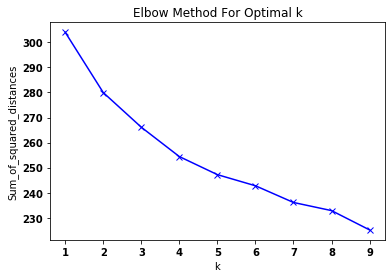

In [59]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [60]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[2.91147548e-02 4.29582108e-02 3.70125034e-02 3.08672291e-02
  2.34520374e-02 3.38347581e-02 4.93487492e-02 2.88977557e-02
  5.23695746e-02 3.31988702e-02 4.34812583e-02 6.01562789e-02
  7.44240116e-02 3.76355237e-02 5.60659854e-02 2.59928971e-02
  3.20504347e-02 4.65860161e-02 7.87387841e-02 4.48640731e-02
  6.11235659e-02 2.49947838e-02 3.87171952e-02 4.58275841e-02
  2.94904640e-02 3.24629262e-02 4.62685058e-02 2.77951441e-02
  4.72189329e-02 5.92722118e-02 4.15011874e-02 2.90469082e-02
  3.51493915e-02 2.73242858e-02 3.61885064e-02 2.93099301e-02
  3.62520194e-02 4.95829926e-02 3.07301830e-02 2.10817101e-02
  4.18509541e-02 5.97508475e-02 4.36973872e-02 4.28757101e-02
  3.50708651e-02 5.53241589e-02 4.02744756e-02 3.03856132e-02
  3.04617658e-02 2.09757345e-02 3.03533476e-02 3.03499708e-02
  8.88125058e-02 3.78000952e-02 4.50653219e-02 3.56203085e-02
  3.60697716e-02 1.61526434e-02 7.47929105e-02 8.86358422e-02
  2.85617362e-02 5.26254920e-02 3.54288232e-02

['doc_cluster_best_K.pkl']

In [61]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['time'],['work'],['use'],['like'],['new'],['system'],['datum'],['user'],['need'],['code'],['people'],['year'],['way'],['design'],['change'],['high'],['find'],['company'],['know'],['service'],

Top words in Cluster-1 :

['support'],['service'],['information'],['term'],['article'],['provide'],['let'],['help'],['review'],['feature'],['new'],['create'],['need'],['know'],['question'],['release'],['source'],['problem'],['user'],['read'],

Top words in Cluster-2 :

['say'],['year'],['company'],['new'],['people'],['time'],['tell'],['like'],['report'],['find'],['come'],['go'],['service'],['know'],['include'],['work'],['long'],['want'],['world'],['state'],

Top words in Cluster-3 :

['happen'],['try'],['use'],['code'],['project'],['build'],['software'],['want'],['release'],['run'],['review'],['million'],['new'],['work'],['follow'],['available'],['support'],['datum'],['example'],['easy'],

In [62]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

,Title,age,posted_by_user,URL,domain,num_upvotes,comments,text,exception,word_count,newtext,tokens,tokenize_and_stem,tokenize_and_lemmatize,cluster_group
0,Robocallers face fight on many fronts,0 minutes ago,petercooper,https://www.axios.com/robocalls-fcc-congress-t...,phoronix.com,1 point,\n1 point by petercooper 0 minutes ago | hide...,federal regulators lawmakers and private compa...,,202,"(federal, regulators, lawmakers, and, private,...",federal regulators lawmakers and private compa...,feder regul lawmak privat compani haven t foun...,federal regulator lawmaker private company hav...,0
1,World's First and Only Hackproof Site,0 minutes ago,hhs,http://hackprooftechnologies.com/index.html,axios.com,1 point,\n1 point by hhs 0 minutes ago | hide | past ...,in the news,,3,"(in, the, news)",in the news,news,news,1
2,Affinity Profiling and Discrimination by Assoc...,1 minute ago,hexadec,https://poseidon01.ssrn.com/delivery.php?ID=19...,hackprooftechnologies.com,1 point,\n1 point by hexadec 1 minute ago | hide | pa...,,HTTP Error 403: Forbidden,1,(),,,,1
3,React Benefits: A Blessing for Businesses?,2 minutes ago,DyslexicAtheist,https://habr.com/en/post/480070/,ssrn.com,1 point,\n1 point by DyslexicAtheist 2 minutes ago | ...,only users with full accounts can post comment...,,12,"(only, users, with, full, accounts, can, post,...",only users with full accounts can post comment...,user account post comment log,user account post comment log,1
4,Soundness bugs in Rust libraries: can't live w...,3 minutes ago,martinlaz,https://docs.rs/dtolnay/0.0.7/dtolnay/macro._0...,technologyreview.com,1 point,\n1 point by martinlaz 3 minutes ago | hide |...,dtolnay by david tolnay my role at work these ...,,1684,"(dtolnay, by, david, tolnay, my, role, at, wor...",dtolnay by david tolnay my role at work these ...,dtolnay david tolnay role work day help guid b...,dtolnay david tolnay role work day help guide ...,0
5,AI Now Institute Annual Report (2019) [pdf],3 minutes ago,atomlib,https://ainowinstitute.org/AI_Now_2019_Report.pdf,habr.com,1 point,\n1 point by atomlib 3 minutes ago | hide | p...,,HTTP Error 403: Forbidden,1,(),,,,1


In [0]:
cluster_df = pd.DataFrame(data)
cluster_df['cluster_group'].value_counts()

In [64]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[2.91147548e-02 4.29582108e-02 3.70125034e-02 3.08672291e-02
  2.34520374e-02 3.38347581e-02 4.93487492e-02 2.88977557e-02
  5.23695746e-02 3.31988702e-02 4.34812583e-02 6.01562789e-02
  7.44240116e-02 3.76355237e-02 5.60659854e-02 2.59928971e-02
  3.20504347e-02 4.65860161e-02 7.87387841e-02 4.48640731e-02
  6.11235659e-02 2.49947838e-02 3.87171952e-02 4.58275841e-02
  2.94904640e-02 3.24629262e-02 4.62685058e-02 2.77951441e-02
  4.72189329e-02 5.92722118e-02 4.15011874e-02 2.90469082e-02
  3.51493915e-02 2.73242858e-02 3.61885064e-02 2.93099301e-02
  3.62520194e-02 4.95829926e-02 3.07301830e-02 2.10817101e-02
  4.18509541e-02 5.97508475e-02 4.36973872e-02 4.28757101e-02
  3.50708651e-02 5.53241589e-02 4.02744756e-02 3.03856132e-02
  3.04617658e-02 2.09757345e-02 3.03533476e-02 3.03499708e-02
  8.88125058e-02 3.78000952e-02 4.50653219e-02 3.56203085e-02
  3.60697716e-02 1.61526434e-02 7.47929105e-02 8.86358422e-02
  2.85617362e-02 5.26254920e-02 3.54288232e-02 6.86486511e-02
  2.6393

In [65]:
km.cluster_centers_.argsort()

array([[ 57,  78,  49,  39, 102,   4,  82,  21,  15,  64,  33,  27,  96,
         60,   7,  31,   0,  35,  24,  51,  50,  47,  97,  48,  38,   3,
         91,  85,  81,  66,  73,  16,  25,   9,  71,  74,   5,  44,  32,
         62,  55,  56,  34,  36, 101,  75,   2,  13,  89,  53, 110,  22,
         94,  46, 106,  87,  30,  40, 105,  68,  43,   1, 109,  86,  77,
         65,  88,  10,  42,  72,  76,  19,  54,  70,  67,  23,  99,  26,
         17,  80,  28,  95,  90,  79,  98,  84,   6,  37,  92,   8,  61,
         69,  83,  45,  14,  29,  41,  11,  20, 107, 111,  63,  12,  58,
        104,  18,  93,  59,  52, 103, 108, 100],
       [  0,  34,  37,  38,  39,  61,  66,  75,  24,  82,  93,  95,  96,
         98,  99, 101, 106,  84,  23,  55,  11,  18,  15,   2,   9,  94,
         64,  86,  80,  47,  62,  54,  79,   4, 100,  22,  36,  65,  81,
        109,  30, 108,  91,  56,  20,  53,  48,   7,   1,  14,  63, 102,
         26,  68,  49, 107,  16,  19,  51,  76,  27,  31,   6,   8,  90,
  

In [66]:
km.cluster_centers_.argsort()[:,::-1]

array([[100, 108, 103,  52,  59,  93,  18, 104,  58,  12,  63, 111, 107,
         20,  11,  41,  29,  14,  45,  83,  69,  61,   8,  92,  37,   6,
         84,  98,  79,  90,  95,  28,  80,  17,  26,  99,  23,  67,  70,
         54,  19,  76,  72,  42,  10,  88,  65,  77,  86, 109,   1,  43,
         68, 105,  40,  30,  87, 106,  46,  94,  22, 110,  53,  89,  13,
          2,  75, 101,  36,  34,  56,  55,  62,  32,  44,   5,  74,  71,
          9,  25,  16,  73,  66,  81,  85,  91,   3,  38,  48,  97,  47,
         50,  51,  24,  35,   0,  31,   7,  60,  96,  27,  33,  64,  15,
         21,  82,   4, 102,  39,  49,  78,  57],
       [ 92,  83,  43,  97,   3,  70,  50,  40,  78,  28,  59,  17,  58,
         45,  71,  73,  89,  67, 104,  72,  44, 103,  33,  74,  88,  69,
         60,  35,  21, 110, 111,  42, 105,  77,  12,  57,  87,   5,  25,
         32,  29,  52,  13,  41,  46,  85,  10,  90,   8,   6,  31,  27,
         76,  51,  19,  16, 107,  49,  68,  26, 102,  63,  14,   1,   7,
  

In [67]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['time'],['work'],['use'],['like'],['new'],['system'],

Top words in Cluster-1 :

['support'],['service'],['information'],['term'],['article'],['provide'],

Top words in Cluster-2 :

['say'],['year'],['company'],['new'],['people'],['time'],

Top words in Cluster-3 :

['happen'],['try'],['use'],['code'],['project'],['build'],

In [68]:
from sklearn.decomposition import TruncatedSVD

n_components = 26

svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=20,
             random_state=143, tol=0.0)

In [69]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"\nTotal Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"\nThe singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.0935574  0.0634984  0.04434292 0.03842685 0.03149611 0.02926005
 0.02581421 0.02486432 0.0227425  0.01968909 0.01847286 0.01744708
 0.01721257 0.01663101 0.01635415 0.01552814 0.01519329 0.01421615
 0.01372639 0.01307949 0.01290932 0.01267937 0.01251776 0.01220969
 0.01120402 0.01105837]

Total Explained Variance : 62.41 %

The singular values are [9.2251993  4.40928541 3.67609894 3.42586264 3.09523986 2.98271595
 2.80159308 2.749641   2.62996242 2.44776516 2.36998132 2.30648652
 2.287817   2.24891718 2.23060857 2.17391717 2.1497043  2.07906516
 2.04293657 1.99435014 1.98167769 1.96585829 1.9510183  1.92683208
 1.84634608 1.83370663]


In [70]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.05127    0.08136776 0.06545345 0.06233024 0.05185444 0.05729619
 0.08851032 0.06514769 0.08951757 0.07236349 0.07813052 0.112902
 0.12339215 0.09301902 0.14757531 0.04657003 0.05921782 0.08380306
 0.12601248 0.08705318 0.09003108 0.05043407 0.06878385 0.08487675
 0.05619154 0.06232139 0.07429589 0.04705935 0.07698177 0.12066015
 0.07473414 0.05191829 0.05890391 0.05860113 0.07255282 0.06979413
 0.09025801 0.09050595 0.04986792 0.09796372 0.09415946 0.09455855
 0.09530535 0.08321149 0.07338583 0.11431866 0.07872524 0.06473643
 0.05163109 0.05378296 0.05998377 0.05611644 0.17077879 0.08222475
 0.09064386 0.06709127 0.06366482 0.06418498 0.13167327 0.20230993
 0.05363244 0.09002119 0.06011832 0.15277241 0.05689415 0.07719823
 0.05359829 0.08098144 0.07521344 0.11209544 0.08437592 0.0638705
 0.074989   0.07101189 0.08512185 0.06200129 0.08354277 0.07838951
 0.05383624 0.08345571 0.09037497 0.27267909 0.04899641 0.11359278
 0.08133419 0.05775136 0.06930635 0.07456465 0.0

In [71]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print("\nDoc Topic Matrix: \n",doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print("\nSVD Categories: \n",svd_categories)


Doc Topic Matrix: 
 [[ 0.35389077  0.13762926  0.18904131 ...  0.00695688 -0.03293656
   0.14886262]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.54312726  0.06017301 -0.21643461 ... -0.04764279 -0.03506077
   0.01895396]
 [ 0.23975149  0.07128112 -0.42587795 ...  0.02509964  0.00190984
   0.00652143]
 [ 0.60010103 -0.00357946 -0.05556103 ... -0.0769217  -0.05190645
  -0.00488959]]

SVD Categories: 
 [ 0  0  0  7  0  0  0  0  0  1  0  0  0  0  0  6  0  0  0  0  0  0  0  0
  0  0  6  0  3  0  0  0  0 18 17  0  0  0 12  0  0  0  0  0 16  0  0  1
 14  0  0 17  0  0  0 13  0  0  0  0  0  0  1  0  0  0  0  0  0 16  0  6
  0 24  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23  0
  0  0  0 10  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1
  0  0  0  0  7  0  1  0  1  0  0  0  0  0  0 

In [73]:
data['SVD_group'] = svd_categories
pd.DataFrame(data).head(10)

,Title,age,posted_by_user,URL,domain,num_upvotes,comments,text,exception,word_count,newtext,tokens,tokenize_and_stem,tokenize_and_lemmatize,cluster_group,SVD_group
0,Robocallers face fight on many fronts,0 minutes ago,petercooper,https://www.axios.com/robocalls-fcc-congress-t...,phoronix.com,1 point,\n1 point by petercooper 0 minutes ago | hide...,federal regulators lawmakers and private compa...,,202,"(federal, regulators, lawmakers, and, private,...",federal regulators lawmakers and private compa...,feder regul lawmak privat compani haven t foun...,federal regulator lawmaker private company hav...,0,0
1,World's First and Only Hackproof Site,0 minutes ago,hhs,http://hackprooftechnologies.com/index.html,axios.com,1 point,\n1 point by hhs 0 minutes ago | hide | past ...,in the news,,3,"(in, the, news)",in the news,news,news,1,0
2,Affinity Profiling and Discrimination by Assoc...,1 minute ago,hexadec,https://poseidon01.ssrn.com/delivery.php?ID=19...,hackprooftechnologies.com,1 point,\n1 point by hexadec 1 minute ago | hide | pa...,,HTTP Error 403: Forbidden,1,(),,,,1,0
3,React Benefits: A Blessing for Businesses?,2 minutes ago,DyslexicAtheist,https://habr.com/en/post/480070/,ssrn.com,1 point,\n1 point by DyslexicAtheist 2 minutes ago | ...,only users with full accounts can post comment...,,12,"(only, users, with, full, accounts, can, post,...",only users with full accounts can post comment...,user account post comment log,user account post comment log,1,7
4,Soundness bugs in Rust libraries: can't live w...,3 minutes ago,martinlaz,https://docs.rs/dtolnay/0.0.7/dtolnay/macro._0...,technologyreview.com,1 point,\n1 point by martinlaz 3 minutes ago | hide |...,dtolnay by david tolnay my role at work these ...,,1684,"(dtolnay, by, david, tolnay, my, role, at, wor...",dtolnay by david tolnay my role at work these ...,dtolnay david tolnay role work day help guid b...,dtolnay david tolnay role work day help guide ...,0,0
5,AI Now Institute Annual Report (2019) [pdf],3 minutes ago,atomlib,https://ainowinstitute.org/AI_Now_2019_Report.pdf,habr.com,1 point,\n1 point by atomlib 3 minutes ago | hide | p...,,HTTP Error 403: Forbidden,1,(),,,,1,0
6,"Algorithms drive online discrimination, academ...",3 minutes ago,burntsushi,https://www.ft.com/content/bc959e8c-1b67-11ea-...,docs.rs,1 point,\n1 point by burntsushi 3 minutes ago | hide ...,gain a global perspective on the us and go bey...,,32,"(gain, a, global, perspective, on, the, us, an...",gain a global perspective on the us and go bey...,gain global perspect curat news analysi journa...,gain global perspective curated news analysis ...,1,0
7,VirtualBox 6.1,5 minutes ago,atomlib,https://www.virtualbox.org/wiki/Changelog-6.1#v0,habr.com,1 point,\n1 point by atomlib 5 minutes ago | hide | p...,this page lists all changes of the virtualbox ...,,1107,"(this, page, lists, all, changes, of, the, vir...",this page lists all changes of the virtualbox ...,page list chang virtualbox download branch vir...,page list change virtualbox download branch vi...,0,0
8,AT&T Launches 5G Network in 10 Cities,6 minutes ago,atlasunshrugged,https://about.att.com/story/2019/5g_launch.html,ainowinstitute.org,1 point,\n1 point by atlasunshrugged 6 minutes ago | ...,consumers and businesses in birmingham ala ind...,,920,"(consumers, and, businesses, in, birmingham, a...",consumers and businesses in birmingham ala ind...,consum busi birmingham ala indianapoli los ang...,consumer business birmingham ala indianapolis ...,0,0
9,Show HN: Drop-In Minimal CSS – Preview Minimal...,7 minutes ago,DyslexicAtheist,https://github.com/dohliam/dropin-minimal-css,ft.com,1 point,\n1 point by DyslexicAtheist 7 minutes ago | ...,github is home to over million developers work...,,406,"(github, is, home, to, over, million, develope...",github is home to over million developers work...,github home million develop work host review c...,github home million developer work host review...,3,1


In [0]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

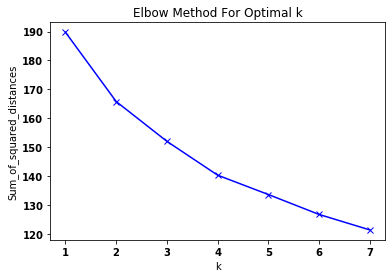

In [75]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [76]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

the cluster centers are [[ 4.56403502e-02  9.75401112e-03 -3.22927116e-02  3.16047499e-02
   2.57703902e-02 -1.40402263e-02  4.13853936e-03 -1.53477248e-03
   8.02479616e-03 -8.94743039e-03 -7.51244714e-03  1.37660204e-02
   2.41943330e-03  2.01269747e-03  9.63922243e-03  1.26412032e-02
   2.59817829e-03 -2.39600421e-03  8.17152530e-04 -4.22808756e-03
  -8.55364771e-03  1.12836408e-02  1.02133755e-03  5.90187666e-03
   8.56863916e-03  4.29314807e-03]
 [ 4.79504035e-01  6.95652154e-02 -7.82433199e-02 -6.20394290e-02
  -8.61093399e-04  2.00937691e-02 -9.32730152e-03 -1.54874590e-02
  -1.24511980e-02 -9.25585085e-03  5.79194030e-03  7.42922344e-03
  -6.03055640e-03 -2.41104388e-03 -5.69577799e-04 -3.82200114e-03
  -3.03269046e-03 -2.06635377e-04  3.30827296e-03  2.00047525e-03
   4.41945977e-03  1.43012683e-03  4.18286800e-03 -9.77641951e-04
  -1.65596288e-03 -2.73033747e-03]
 [ 5.85738951e-01 -2.96585561e-01  1.38172237e-01  1.09664376e-01
  -3.13907841e-02  6.50562309e-03  4.45438615e-0

['doc_topic_cluster_best_K.pkl']

In [0]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [78]:
doc_cluster_df = pd.DataFrame(data)
doc_cluster_df['doc_topic_cluster_group'].value_counts()

1    221
0    175
2     74
3     24
Name: doc_topic_cluster_group, dtype: int64

In [0]:
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['tokenize_and_lemmatize']]

In [0]:
grouped_text = doc_cluster_df.groupby('cluster_group')['tokenized_text']

In [0]:
from itertools import chain, product


In [0]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [94]:
frequent_words_df.head()

,values,cluster_id,counts
0,"[s, t, time, use, work, like, datum, new, user...",0,"[3050, 1232, 1054, 791, 770, 764, 759, 710, 61..."
1,"[f, n, x, w, z, o, g, s, l, t, k, u, y, m, v, ...",1,"[1363, 922, 874, 838, 818, 817, 805, 805, 799,..."
2,"[s, say, staff, session, t, child, want, exper...",2,"[2489, 1891, 1715, 1701, 1617, 1241, 1227, 105..."
3,"[github, download, try, happen, use, desktop, ...",3,"[105, 104, 101, 96, 67, 48, 47, 43, 41, 36, 36..."


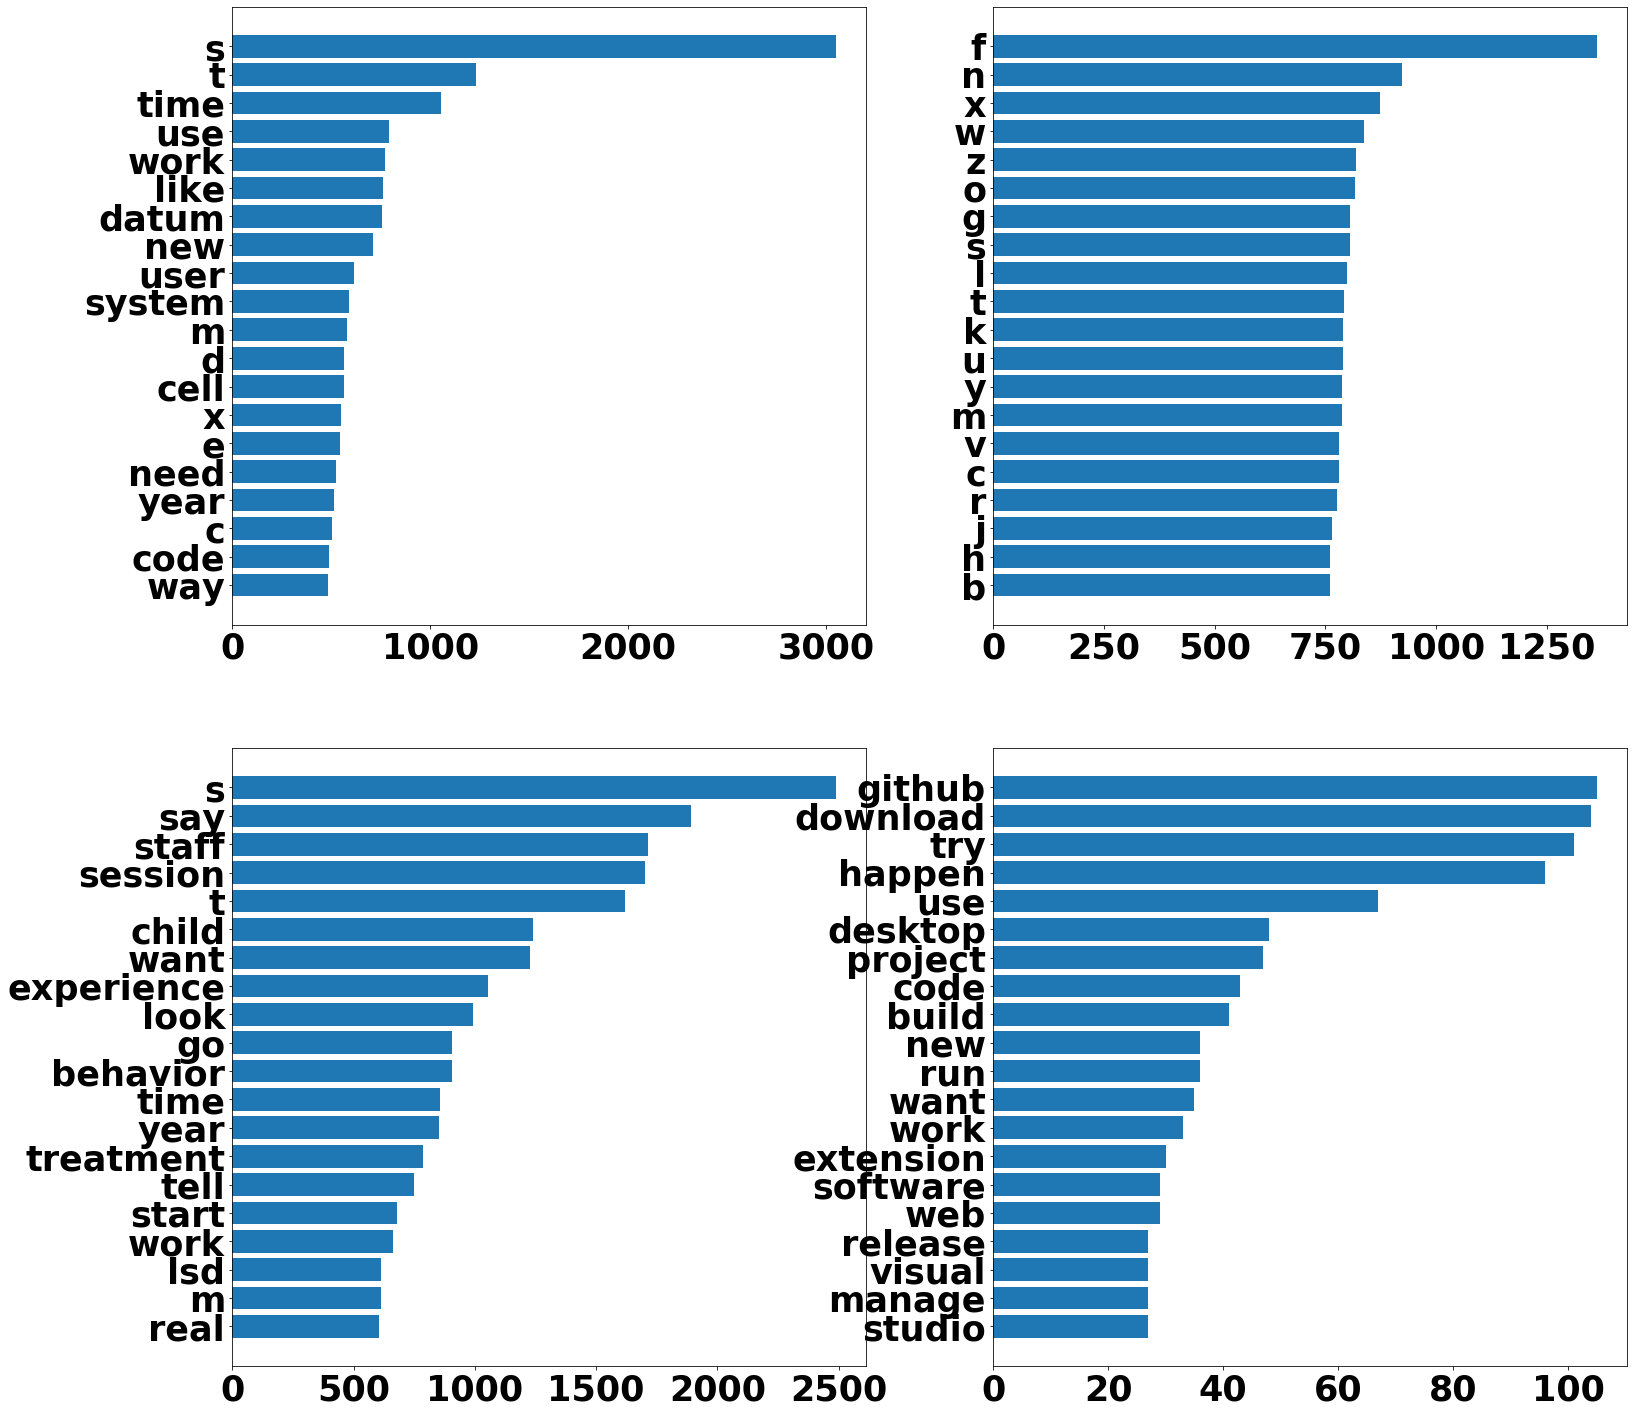

In [96]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

# top 3 topics 

# topic 1 is related to new year work.
# topic 2 is related to building a project
# topic 3 is related to trying code and project release 

## Observations

We can notice that with document topic matrix.we were able to achieve similar results when compared to tfidf matrix. we can also notice that 1st group is related to progamming code ,2nd is related to alphabets,3rd is related to social activities ,4th is related to IT